In [3]:
#1) IMAGEN LENA
import numpy as np
import matplotlib.pyplot as plt


/Users/pablocalderon/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/pablocalderon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


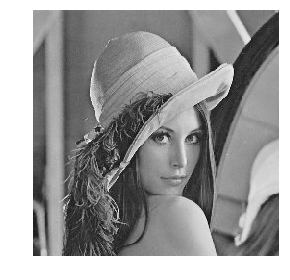

(256, 256)


In [6]:
from skimage import io
img = io.imread('Lena-grayscale.jpg')
io.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)

/Users/pablocalderon/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/Users/pablocalderon/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/pablocalderon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


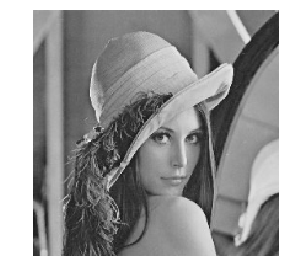

(200, 200)
0.07436862745098123
0.9440690196078371


In [7]:
from skimage.transform import resize
def resize_img(img):
  return resize(img, (200, 200))
img = resize_img(img)
io.imshow(img)
plt.axis('off')
plt.show()
print(img.shape)
print(img.min())
print(img.max())

In [8]:
#2) INTENSIDAD DE 80% true o false
print(img)

R = img >= img.max()*0.8
print(R)
print(R.shape)


[[0.64384157 0.62469647 0.61661961 ... 0.64578039 0.65763294 0.52084706]
 [0.6345051  0.62320157 0.62350588 ... 0.61694902 0.60823059 0.41651608]
 [0.62516863 0.61913725 0.62043137 ... 0.40376471 0.31206275 0.20801569]
 ...
 [0.19726275 0.19704314 0.20741176 ... 0.2794902  0.32392157 0.36298824]
 [0.18433255 0.19545098 0.20071373 ... 0.34107451 0.37298353 0.36581804]
 [0.16996549 0.19686745 0.19118431 ... 0.37287843 0.41008941 0.42250039]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(200, 200)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/Users/pablocalderon/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/Users/pablocalderon/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


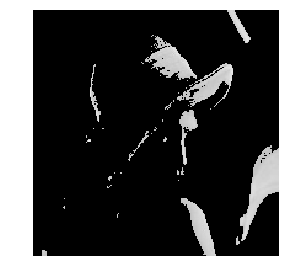

(200, 200)


In [9]:
#3) INTENSIDAD menores 80% son cero

BN = img.copy()
BN[img < img.max()*0.8] = 0
print(BN)
io.imshow(BN)
plt.axis('off')
plt.show()
print(BN.shape)

In [21]:
#4) Teórico

In [65]:
#5)CONVOLUCION FUNCION

def conv2d(image, kernel):
    m, n = kernel.shape
    if (m != n):
        maxi = max(m,n)
        cuad = (maxi,maxi)
        ceros = np.zeros(cuad)
        ceros[:m,:n] = kernel[:m,:n]
        kernel = ceros
        m = maxi
        n = m
        
    if (m == n):
        y, x = image.shape
        y = y - m + 1
        x = x - m + 1
        new_image = np.zeros((y,x))
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
                
        return new_image




[[0.0125302  0.02206275 0.02072471 ... 0.18136784 0.44327843 0.53528784]
 [0.01133333 0.02030902 0.01173804 ... 0.10683608 0.         0.        ]
 [0.         0.         0.         ... 0.02287216 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.0044251  0.         0.01432941]
 [0.00645804 0.01340863 0.02255216 ... 0.         0.01276863 0.03816784]
 [0.00125961 0.00738824 0.01607843 ... 0.         0.01080157 0.        ]]


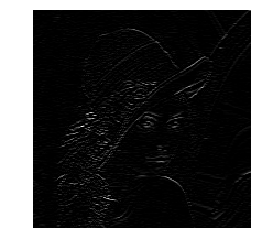

(198, 198)


In [66]:
#6) CONVOLUCION CALCULO

k=np.array([[-1, -1, -1],[2, 2, 2],[-1, -1, -1]])
conv = conv2d(img, k)

#7) MOSTRAR RESULTADO DE 6
#print(conv)
conv[conv <= 0] = 0
print(conv)
plt.imshow(conv,cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print(conv.shape)


[[0.         0.         0.03822118 ... 0.         0.27372078 0.34397961]
 [0.         0.         0.03391216 ... 0.08644549 0.01348392 0.09616157]
 [0.         0.         0.01898039 ... 0.13767686 0.         0.        ]
 ...
 [0.00620235 0.         0.05459137 ... 0.         0.         0.        ]
 [0.         0.         0.07089098 ... 0.         0.         0.0174102 ]
 [0.02785255 0.         0.06049255 ... 0.         0.0493898  0.06923922]]


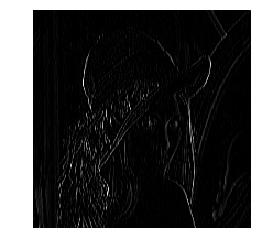

(198, 198)


In [74]:
#8) REEMPLAZAR K POR SU TRANSPUESTA

tK = k.transpose()
convT = conv2d(img, tK)
#Sí cambió, se notan más los contornos verticales y antes se notaban más los horizontales

#9) MOSTRAR RESULTADO DE 8
#print(convT)
convT[convT <= 0] = 0
print(convT)
plt.imshow(convT,cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print(convT.shape)



[[4.40486793 4.40321956 4.37790449 ... 3.30891978 3.13297085 2.85675786]
 [4.36187813 4.36102131 4.35093756 ... 2.99462144 2.54752336 2.07673194]
 [4.33921773 4.34274723 4.35030309 ... 2.48790362 1.9846719  1.59378009]
 ...
 [1.64969224 1.83522967 2.26995264 ... 1.59697142 1.56518375 1.58081129]
 [1.56007743 1.71357155 2.15779717 ... 1.58446584 1.64163673 1.74895451]
 [1.49865277 1.63246906 2.07160941 ... 1.61738039 1.7930254  2.01294571]]


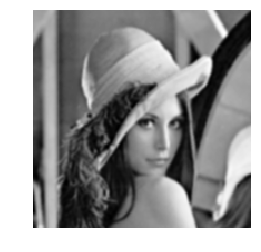

(196, 196)
[[1578.93820271 1586.16295446 1598.54997474 ... 1081.32929769
   980.25957608  869.45609522]
 [1590.72350949 1599.41654652 1612.14879511 ...  976.9569127
   866.52313764  759.4828318 ]
 [1604.86240656 1614.68169128 1626.94793005 ...  859.5336486
   753.74574203  663.53168568]
 ...
 [1561.7652524  1489.0199652  1382.61296625 ...  976.2331397
   999.37171694  995.66578847]
 [1560.31248918 1497.90123839 1398.46273992 ... 1000.27185506
  1013.47452189  995.85941527]
 [1561.88750704 1511.29599558 1418.86895594 ... 1021.41954395
  1021.12382974  988.57957749]]


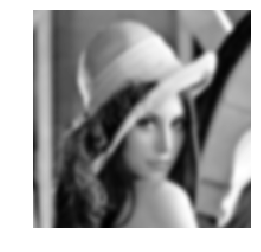

(184, 184)


In [81]:
#10) USAR UN NUEVO KERNEL 1 Y 4 VECES CONSECUTIVAMENTE
kNew=np.array([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])*(1/36)
convKNew1 = conv2d(img, kNew)

convKNew1[convKNew1 <= 0] = 0
print(convKNew1)
plt.imshow(convKNew1,cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print(convKNew1.shape)


convKNew2 = conv2d(convKNew1, kNew)
convKNew3 = conv2d(convKNew2, kNew)
convKNew4 = conv2d(convKNew3, kNew)
print(convKNew4)
plt.imshow(convKNew4,cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print(convKNew4.shape)



In [76]:
#11)

[[-9.34783156e+06 -5.66243424e+06 -1.03140118e+06 ...  1.09657200e+08
   6.03038140e+07 -3.24213088e+06]
 [-1.92731383e+05  4.75101889e+06  8.82930635e+06 ...  5.08750837e+07
  -1.21957803e+07 -7.09052044e+07]
 [ 1.35773735e+07  1.94247068e+07  2.22178465e+07 ... -2.46903843e+07
  -8.36969656e+07 -1.21560344e+08]
 ...
 [ 2.53053036e+07  1.93608883e+07  1.43426553e+07 ... -3.91289404e+07
  -2.21884583e+07 -1.97990711e+06]
 [ 8.27059590e+06  4.11537679e+06  2.64853465e+06 ... -2.84819949e+07
  -6.43942622e+06  1.26408841e+07]
 [-2.03195030e+07 -2.15331795e+07 -1.82903013e+07 ... -1.43169093e+07
   1.11379156e+07  2.82477620e+07]]


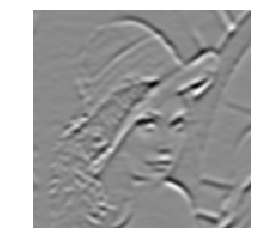

(182, 182)


In [77]:
#12) APLICA KERNEL DEL PUNTO 6 SOBRE LA RESULTANDE DE 10 CON 4 

conv12 = conv2d(convKNew4, k)
print(conv12)
plt.imshow(conv12,cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print(conv12.shape)



In [78]:
#13)

In [79]:
#14)

[[   5.38291922   -9.14069176    4.26088314 ...  -29.79406275
    74.4389851  -119.23979451]
 [   1.65182275   -4.88202824    4.03301647 ...  -32.70219137
    74.58194353 -112.53540078]
 [   2.17482824   -7.71980549   10.06883137 ...  -32.71192627
    57.96471843  -74.53245804]
 ...
 [ -12.63592627  -94.46472941  125.03200314 ...   -5.54965804
     3.43683765  -19.29244863]
 [  -6.05722196 -139.14674196  177.64287059 ...    3.37467608
    -7.90087216   -3.1606902 ]
 [   9.39212863 -202.08779451  255.97255216 ...   17.31247843
   -22.07252549   12.26648314]]


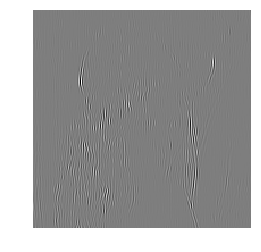

(192, 192)


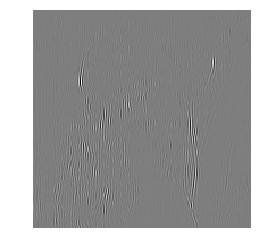

(192, 192)


In [73]:
#15)

conv15_1 = conv2d(img, tK)
conv15_2 = conv2d(conv15_1, tK)
conv15_3 = conv2d(conv15_2, tK)
conv15_4 = conv2d(conv15_3, tK)

print(conv15_4)
plt.imshow(conv15_4,cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print(conv15_4.shape)

conv15 = conv15_4 - img[:192,:192]
plt.imshow(conv15,cmap=plt.cm.gray)
plt.axis('off')
plt.show()
print(conv15.shape)

In [ ]:
#16) NOS DAN LOS MISMOS VALORES